# ASSIGNMENT 01

Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [1]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#loading the dataset

df = pd.read_csv("uber.csv")

In [18]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.shape

(200000, 9)

# 1.Pre-process the dataset.

In [20]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [21]:
#dropping rows with missing values

df.dropna(inplace = True)

In [22]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [23]:
#dropping unwanted columns

df.drop(labels='Unnamed: 0',axis=1,inplace=True)
df.drop(labels='key',axis=1,inplace=True)

In [24]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [25]:
#converting datatype of column "pickup_datetime" from object to DateTime

df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [26]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [27]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


# 2. Identify outliers.

OUTLIER: An object that deviates significantly from the rest of the objects.

In [ ]:
# data visualization
# plotting distribution plot

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.distplot(df['fare_amount'])

In [ ]:
sns.distplot(df['pickup_latitude'])

In [ ]:
sns.distplot(df['pickup_longitude'])

In [ ]:
sns.distplot(df['dropoff_longitude'])

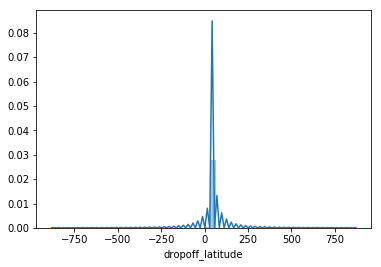

In [30]:
sns.distplot(df['dropoff_latitude'])

In [31]:
#creating a function to identify outliers

def find_outliers_IQR(df):
   q1 = df.quantile(0.25)
   q3 = df.quantile(0.75)
   IQR = q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [32]:
#getting outlier details for column "fair_amount" using the above function

outliers = find_outliers_IQR(df["fare_amount"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 17166
max outlier value: 499.0
min outlier value: -52.0


6         24.50
30        25.70
34        39.50
39        29.00
48        56.80
82        26.10
84        49.57
98        30.90
99        26.90
104       43.00
113       35.30
145       38.54
162       29.00
196       24.00
202       23.00
204       45.00
221       29.50
223       23.70
225       24.00
226       49.80
268       24.00
279       23.00
307       34.25
310       39.33
315       45.00
339       35.70
348       29.30
366       49.80
375       43.00
401       57.33
          ...  
199757    45.00
199776    36.50
199790    23.70
199801    23.50
199805    45.00
199829    38.83
199837    26.50
199860    23.00
199872    41.83
199882    49.57
199885    22.90
199891    31.47
199897    33.87
199903    33.33
199910    26.33
199914    57.33
199923    36.00
199926    33.00
199932    24.90
199937    28.10
199957    24.50
199960    24.50
199963    39.00
199965    34.94
199972    45.00
199976    49.70
199977    43.50
199982    57.33
199985    24.00
199997    30.90
Name: fare_amount, Lengt

In [33]:
#you can also pass two columns as argument to the function (here "passenger_count" and "fair_amount")

outliers = find_outliers_IQR(df[["passenger_count","fare_amount"]])
outliers

,passenger_count,fare_amount
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,5.0,NaN
5,NaN,NaN
6,5.0,24.50
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


# 3. Check the correlation.

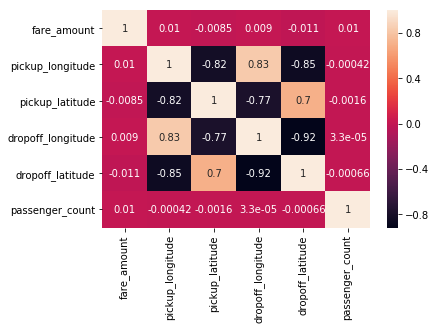

In [35]:
#creating a correlation matrix

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [36]:
#splitting column "pickup_datetime" into 5 columns: "day", "hour", "month", "year", "weekday"
#for a simplified view

import calendar
df['day']=df['pickup_datetime'].apply(lambda x:x.day)
df['hour']=df['pickup_datetime'].apply(lambda x:x.hour)
df['month']=df['pickup_datetime'].apply(lambda x:x.month)
df['year']=df['pickup_datetime'].apply(lambda x:x.year)
df['weekday']=df['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])

df.drop(['pickup_datetime'],axis =1 , inplace = True)

In [37]:
#label encoding (categorical to numerical)

df.weekday = df.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [38]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,19,5,2015,4
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,20,7,2009,5
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,21,8,2009,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,8,6,2009,5
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,28,17,8,2014,4


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 11 columns):
fare_amount          199999 non-null float64
pickup_longitude     199999 non-null float64
pickup_latitude      199999 non-null float64
dropoff_longitude    199999 non-null float64
dropoff_latitude     199999 non-null float64
passenger_count      199999 non-null int64
day                  199999 non-null int64
hour                 199999 non-null int64
month                199999 non-null int64
year                 199999 non-null int64
weekday              199999 non-null int64
dtypes: float64(5), int64(6)
memory usage: 23.3 MB


In [40]:
#splitting the data into train and test

from sklearn.model_selection import train_test_split

In [41]:
#independent variables (x)

x=df.drop("fare_amount", axis=1)
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
0,-73.999817,40.738354,-73.999512,40.723217,1,7,19,5,2015,4
1,-73.994355,40.728225,-73.994710,40.750325,1,17,20,7,2009,5
2,-74.005043,40.740770,-73.962565,40.772647,1,24,21,8,2009,1
3,-73.976124,40.790844,-73.965316,40.803349,3,26,8,6,2009,5
4,-73.925023,40.744085,-73.973082,40.761247,5,28,17,8,2014,4
5,-73.969019,40.755910,-73.969019,40.755910,1,12,2,2,2011,6
6,-73.961447,40.693965,-73.871195,40.774297,5,12,7,10,2014,0
7,0.000000,0.000000,0.000000,0.000000,1,11,13,12,2012,2
8,-73.975187,40.745767,-74.002720,40.743537,1,17,9,2,2012,5
9,-74.001065,40.741787,-73.963040,40.775012,1,29,19,3,2012,4


In [42]:
#dependent variable (y)

y=df["fare_amount"]

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [44]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
80768,-73.983703,40.725752,-73.972000,40.793888,1,22,1,2,2009,0
111783,-73.961175,40.760667,-73.976507,40.747570,1,7,14,3,2009,6
24615,-73.947784,40.783111,-73.955408,40.779405,1,17,11,3,2011,4
46932,-73.980596,40.733797,-73.972092,40.747297,1,15,7,1,2010,5
86655,-73.963035,40.758380,-73.987877,40.745477,2,28,19,6,2014,6


In [45]:
x_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
13588,-73.982810,40.771687,-73.977065,40.763200,1,25,22,6,2013,2
29803,-73.991985,40.725763,-73.995762,40.759797,1,20,20,2,2011,0
138265,-73.985730,40.767882,-73.998525,40.760667,1,20,14,10,2013,0
82856,-73.973200,40.748100,-73.973500,40.748200,1,17,18,11,2011,4
162747,-74.007432,40.716580,-73.986858,40.761328,1,10,22,2,2009,2


In [46]:
y_train.head()

80768     19.7
111783     7.7
24615      4.5
46932      4.5
86655     10.0
Name: fare_amount, dtype: float64

In [47]:
y_test.head()

13588      5.5
29803     11.3
138265     6.5
82856     18.1
162747    11.3
Name: fare_amount, dtype: float64

# 4. Implement linear regression and random forest regression models.
# 5. Evaluate the models and compare their respective scores like R2, RMSE, etc.


In [49]:
#Linear Regression

from sklearn.linear_model import LinearRegression
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
predictedvalues = lrmodel.predict(x_test)

In [51]:
#Calculating the value of RMSE for Linear Regression

from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
print("RMSE value for Linear regression is", lrmodelrmse)

RMSE value for Linear regression is 9.80668770843381


In [52]:
#Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)

In [57]:
rfrmodel.fit(x_train,y_train)
rfrmodel_pred= rfrmodel.predict(x_test)

In [58]:
#Calculating the value of RMSE for Random Forest Regression

rfrmodel_rmse=np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random forest regression is ",rfrmodel_rmse)

RMSE value for Random forest regression is  4.751164233748485


In [59]:
rfrmodel_pred.shape

(40000,)

# Predict the price of the Uber ride

In [60]:
test = pd.read_csv("https://raw.githubusercontent.com/piyushpandey758/Uber-Fare-Prediction/master/testt.csv")

In [61]:
test.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,37338,31401407,2011-02-10 19:06:00.000000169,2011-02-10 19:06:00 UTC,-73.951662,40.790710,-73.947570,40.756220,1
1,1,160901,33158465,2011-06-23 09:24:00.000000157,2011-06-23 09:24:00 UTC,-73.951007,40.771508,-73.974075,40.763553,1
2,2,40428,10638355,2012-07-14 10:37:00.000000149,2012-07-14 10:37:00 UTC,-73.996473,40.747930,-73.990298,40.756152,6
3,3,63353,3836845,2014-10-19 22:27:05.0000002,2014-10-19 22:27:05 UTC,-73.997934,40.716890,-73.952617,40.727149,1
4,4,165491,27114503,2015-05-25 22:54:43.0000001,2015-05-25 22:54:43 UTC,-73.952583,40.714039,-73.906128,40.711281,1


In [62]:
test.drop(test[['Unnamed: 0.1.1','Unnamed: 0','Unnamed: 0.1','key']],axis=1,inplace=True)

In [63]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [64]:
#converting datatype of column "pickup_datetime" from object to DateTime

test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"])

In [65]:
#splitting column "pickup_datetime" into 5 columns: "day", "hour", "month", "year", "weekday"
#for a simplified view
#label encoding weekdays

test['day']=test['pickup_datetime'].apply(lambda x:x.day)
test['hour']=test['pickup_datetime'].apply(lambda x:x.hour)
test['month']=test['pickup_datetime'].apply(lambda x:x.month)
test['year']=test['pickup_datetime'].apply(lambda x:x.year)
test['weekday']=test['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])

test.weekday = test.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

test.drop(['pickup_datetime'], axis = 1, inplace = True)

test.head(5)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
0,-73.951662,40.790710,-73.947570,40.756220,1,10,19,2,2011,4
1,-73.951007,40.771508,-73.974075,40.763553,1,23,9,6,2011,4
2,-73.996473,40.747930,-73.990298,40.756152,6,14,10,7,2012,6
3,-73.997934,40.716890,-73.952617,40.727149,1,19,22,10,2014,0
4,-73.952583,40.714039,-73.906128,40.711281,1,25,22,5,2015,1


In [66]:
#Prediction!

rfrmodel_pred= rfrmodel.predict(test)

In [67]:
df_pred = pd.DataFrame(rfrmodel_pred)
df_pred

,0
0,11.3210
1,8.8090
2,5.1400
3,12.7660
4,11.7680
5,5.1840
6,8.5750
7,9.2200
8,6.3500
9,7.3650


In [68]:
#to_csv() function exports the DataFrame to CSV format

df_pred.to_csv('pred.csv')